## Classification(分类模型)
#### LPM(Linear Probability Model, 线性概率模型)
$$y_i=\beta _0+\beta _1x_{1i}+\beta _2x_{2i}+\dots+\beta _kx_{ki}+\mu _i$$
$$y_i=x_i'\beta+u_i(i=1,2,\dots,n)$$
- 存在内生性问题：$y_i\text{只能取}0\text{或}1\text{（回归系数估计出来不一致且有偏）}$
$$u_i=\begin{cases}
1-x_i'\beta, &y_i=1 \\
-x_i'\beta, &y_i=0
\end{cases}$$
$$\text{显然}cov(x_i,u_i)\neq 0$$

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

np.set_printoptions(suppress=True)

In [28]:
data = pd.read_excel('fruit_data.xlsx', index_col="ID")
data.sample(5)

,mass,width,height,color_score,fruit_name
ID,,,,,
29,190,7.5,8.1,0.74,orange
4,178,7.1,7.8,0.92,apple
35,144,6.8,7.4,0.75,orange
9,164,7.3,7.7,0.70,apple
34,158,7.2,7.8,0.77,orange


In [29]:
data[data.isnull()['fruit_name'] == True]

,mass,width,height,color_score,fruit_name
ID,,,,,
39,158,7.1,7.6,0.72,NaN
40,190,7.5,7.9,0.77,NaN
41,189,7.6,7.7,0.77,NaN
42,160,7.9,6.9,0.65,NaN


In [30]:
train_X = data[data['fruit_name'].notnull()].iloc[:, :4]
train_y = data[data['fruit_name'].notnull()]['fruit_name']
test_X = data[data.isnull()['fruit_name'] == True].iloc[:, :4]
test_X

,mass,width,height,color_score
ID,,,,
39,158,7.1,7.6,0.72
40,190,7.5,7.9,0.77
41,189,7.6,7.7,0.77
42,160,7.9,6.9,0.65


#### 方法一：Logistic Regression(逻辑回归)
$$\begin{cases}
P(y=1|x)=F(x,\beta) \\
P(y=0|x)=1-F(x,\beta)
\end{cases}$$
$F(x,\beta)$一般适用于值域$[0,1]$的函数，一般可去下面两个函数
- 标准正态分布的累积密度函数：$$\Phi(x)=\int _{-\infty}^x\frac{1}{\sqrt{2\pi}}e^{-\frac{t^2}{2}}dt$$
    - $$F(x,\beta)=\Phi(x_i'\beta)=\int^{x_i'\beta}_{-\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{t^2}{2}}dt$$ 
    - $$\text{prohit回归}$$
- Sigmoid 函数：$$S(x)=\frac{exp(x)}{1+exp(x)}$$
    - $$F(x,\beta)=S(x_i'\beta)=\frac{exp(x_i'\beta)}{1+exp(x_i'\beta)}$$
    - $$\text{logistic回归}$$


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()
LR.fit(train_X, train_y)
print(LR.score(train_X, train_y))

0.7105263157894737


In [33]:
# 预测
print(LR.predict(test_X))
# 预测为0和1的概率
print(LR.predict_proba(test_X))

['orange' 'orange' 'orange' 'apple']
[[0.45469055 0.54530945]
 [0.36879181 0.63120819]
 [0.45856715 0.54143285]
 [0.81444004 0.18555996]]


#### 方法二：statsmodels

In [34]:
import statsmodels.api as sm

In [35]:
encoder = LabelEncoder()
train_y_encoded = encoder.fit_transform(train_y)

X1 = sm.add_constant(train_X)
lr = sm.Logit(train_y_encoded, X1)
result = lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.449106
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            4
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                  0.3521
Time:                        22:22:14   Log-Likelihood:                -17.066
converged:                       True   LL-Null:                       -26.340
Covariance Type:            nonrobust   LLR p-value:                 0.0009644
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.2016     14.503      0.497      0.620     -21.224      35.627
mass            0.0238      0.024      0.982      0.326      -0.024       0.071
width          -4.3068      1.844     -2.335      0.020      -7.922      -0.692
height          3.7497      1.641      2.286      0.022       0.534       6.965
color_score    -9.8913      5.746     -1.722      0.085     -21.152       1.370
===============================================================================
"""

In [36]:
result.predict(sm.add_constant(test_X))

ID
39    0.852335
40    0.805467
41    0.553901
42    0.027191
dtype: float64

### 机器学习
#### Fisher 线性判别分析(详见子文件夹)
又称 LDA(Linear Discriminant Analysis)
- 给定训练集样例，设法将样例投影到一维的直线上，使得同类样例的投影点尽可能接近和密集，异类投影点尽可能远离。
![mechanismOfLDA](LDA.png "mechanismOfLDA")

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
lda = LinearDiscriminantAnalysis()
X_r = lda.fit(train_X, train_y)
X_r.coef_

array([[  0.03206332,  -4.57480239,   2.87678633, -10.50469726]])

In [39]:
X_r.score(train_X, train_y)

0.7631578947368421

In [40]:
X_r.predict(test_X)

array(['orange', 'orange', 'orange', 'apple'], dtype='<U6')

#### 多分类
- Logistic 回归也可用于多分类问题
- 将 Sigmoid 函数推广到 Softmax 函数

In [41]:
data2 = pd.read_excel('mul_fruit.xlsx', index_col=0)
data2.sample(5)

,mass,width,height,color_score,fruit_name,kind
ID,,,,,,
42,158,7.1,7.5,0.79,orange,3.0
60,158,7.1,7.6,0.72,NaN,NaN
32,116,6.3,7.7,0.72,lemon,2.0
23,216,7.3,10.2,0.71,lemon,2.0
55,86,6.2,4.7,0.80,mandarin,4.0


In [42]:
train_X2 = data2[data2['fruit_name'].notnull()].iloc[:, :4]
train_y2 = data2[data2['fruit_name'].notnull()]['fruit_name']
test_X2 = data2[data2.isnull()['fruit_name'] == True].iloc[:, :4]

In [43]:
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(train_X2, train_y2)

In [44]:
X_r2.score(train_X2, train_y2)

0.8305084745762712

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.concat([train_X2, train_y2], axis=1)

In [47]:
# 支持显示中文
plt.rcParams['font.family'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(font='Heiti TC')

Text(0.5, 1.0, 'LDA of FRUITS dataset')

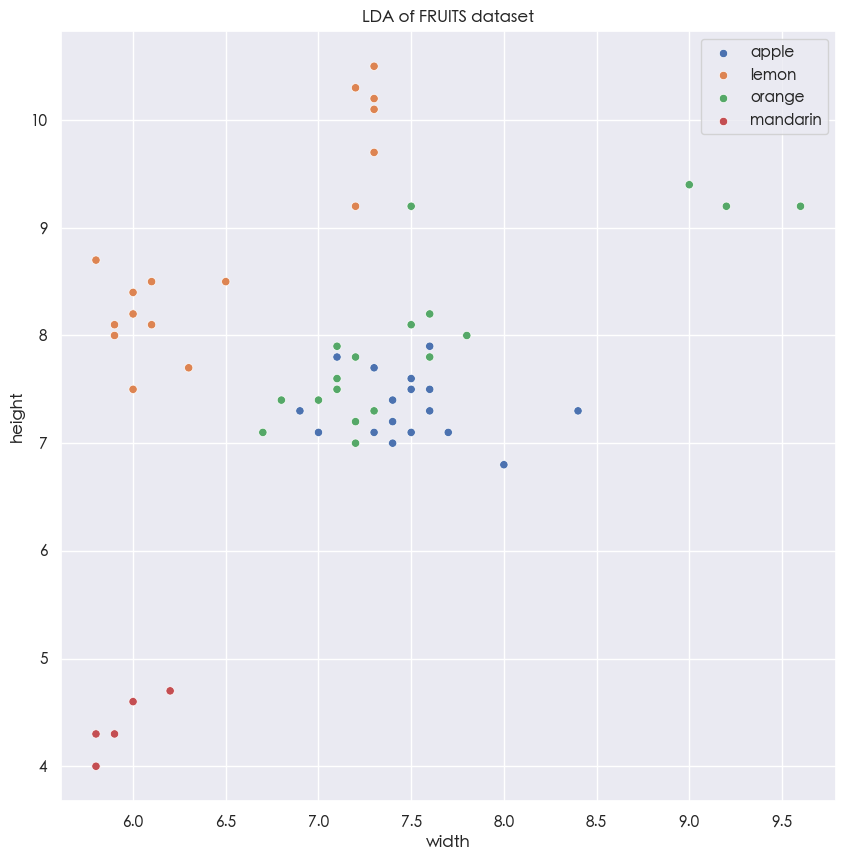

In [48]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='width', y='height', hue='fruit_name', data=df)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of FRUITS dataset')